In [926]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# 예측 모델링을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split # 훈련/평가 데이터분리
from sklearn.linear_model import LogisticRegression # 로지스틱 모델
from sklearn.svm import LinearSVC # 분류용 SVM모델
from sklearn import metrics # 평가용 모듈
from sklearn.model_selection import cross_val_score # 교차검증 함수

# 모델평가를 위한 라이브러리 불러오기
from sklearn.metrics import classification_report # 분류평가지표

from scipy import stats

3) 경제적 변수(실업률, 물가상승률, GDP)와 학업 성취도 사이의 관계 - 실업률이 높거나 물가상승률이 높은 경제적 환경에서 학생들의 학업 중퇴율이 높아질 것이다
- Unemployment rate: 실업률
- Inflation rate: 물가상승률
- GDP: 국내총생산(GDP)
- Debtor: 채무자 여부
- Tuition fees up to date: 학비 납부 여부
- Scholarship holder: 장학금 수혜 여부

EDA
- Curricular units 1st sem (evaluations): 1학기 평가 학점
- Curricular units 2nd sem (evaluations): 2학기 평가 학점
- Target: Dropout 중퇴 / Graduate 졸업 / Enrolled 입학

In [927]:
# 데이터 로드
df = pd.read_csv('./data/data_students.csv', encoding='EUC-KR')

In [928]:
# 관심 있는 변수들 선택
variables = [
    'Inflation rate',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (evaluations)'
]
# 선택된 변수들의 기술 통계량 확인
print(df[variables].describe())

       Inflation rate  Curricular units 1st sem (evaluations)  \
count     4424.000000                             4424.000000   
mean         1.228029                                8.299051   
std          1.382711                                4.179106   
min         -0.800000                                0.000000   
25%          0.300000                                6.000000   
50%          1.400000                                8.000000   
75%          2.600000                               10.000000   
max          3.700000                               45.000000   

       Curricular units 2nd sem (evaluations)  
count                             4424.000000  
mean                                 8.063291  
std                                  3.947951  
min                                  0.000000  
25%                                  6.000000  
50%                                  8.000000  
75%                                 10.000000  
max                           

결측치 확인:
Inflation rate                            0
Curricular units 1st sem (evaluations)    0
Curricular units 2nd sem (evaluations)    0
Target                                    0
dtype: int64


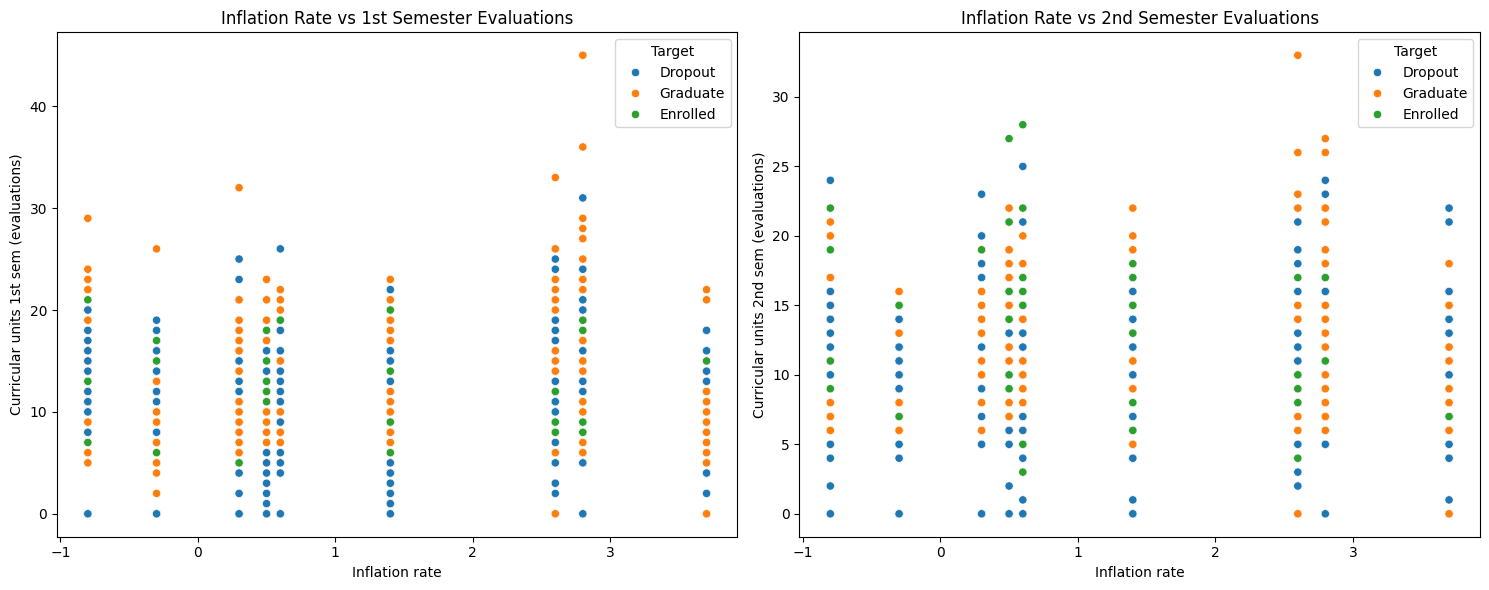

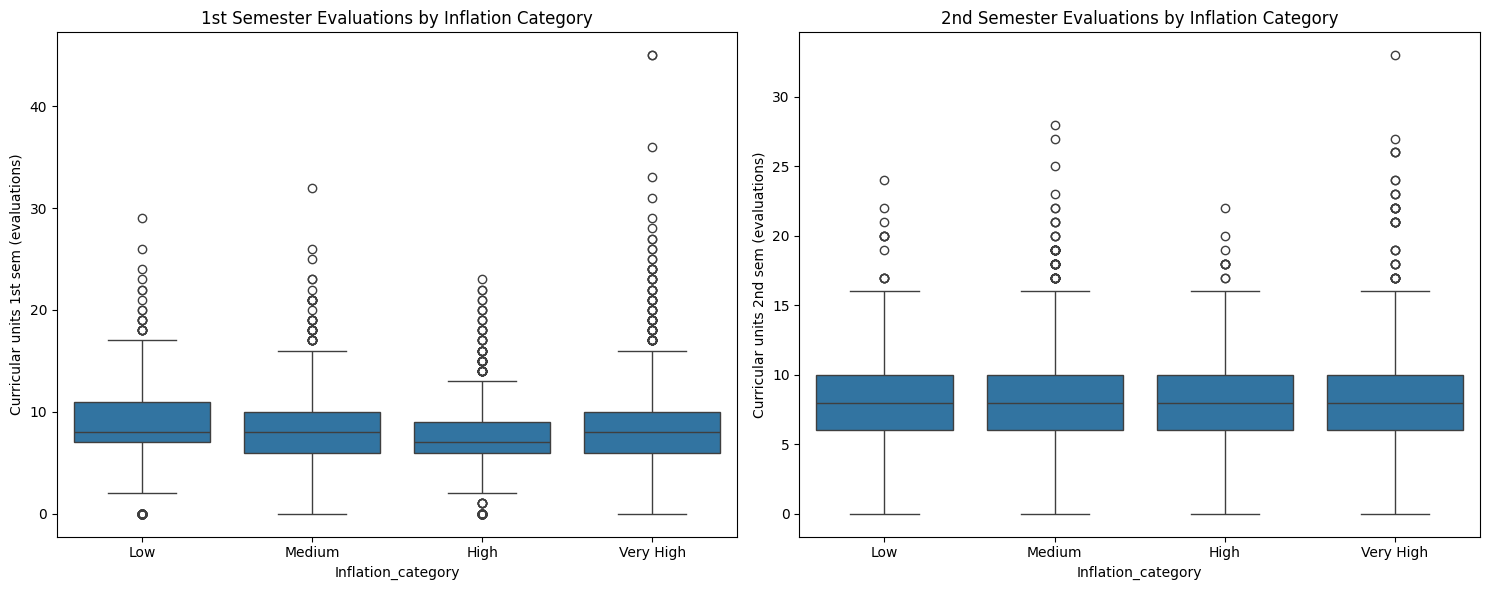

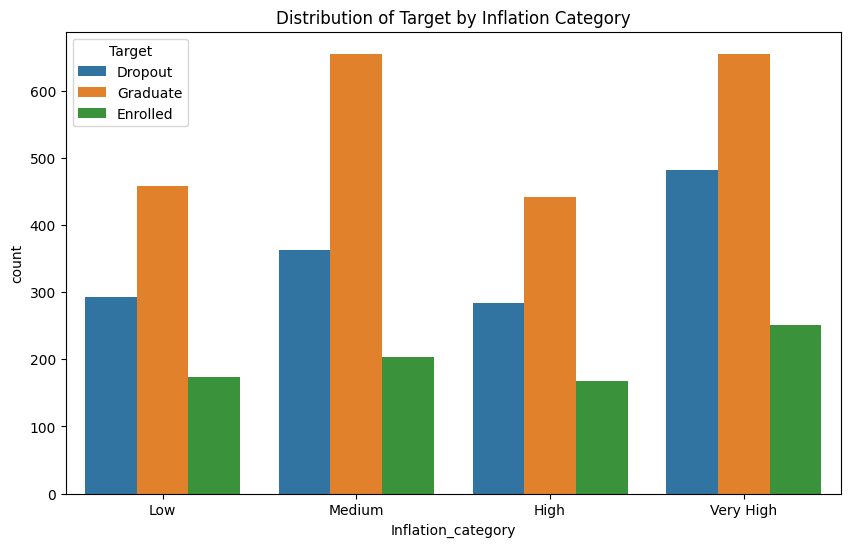

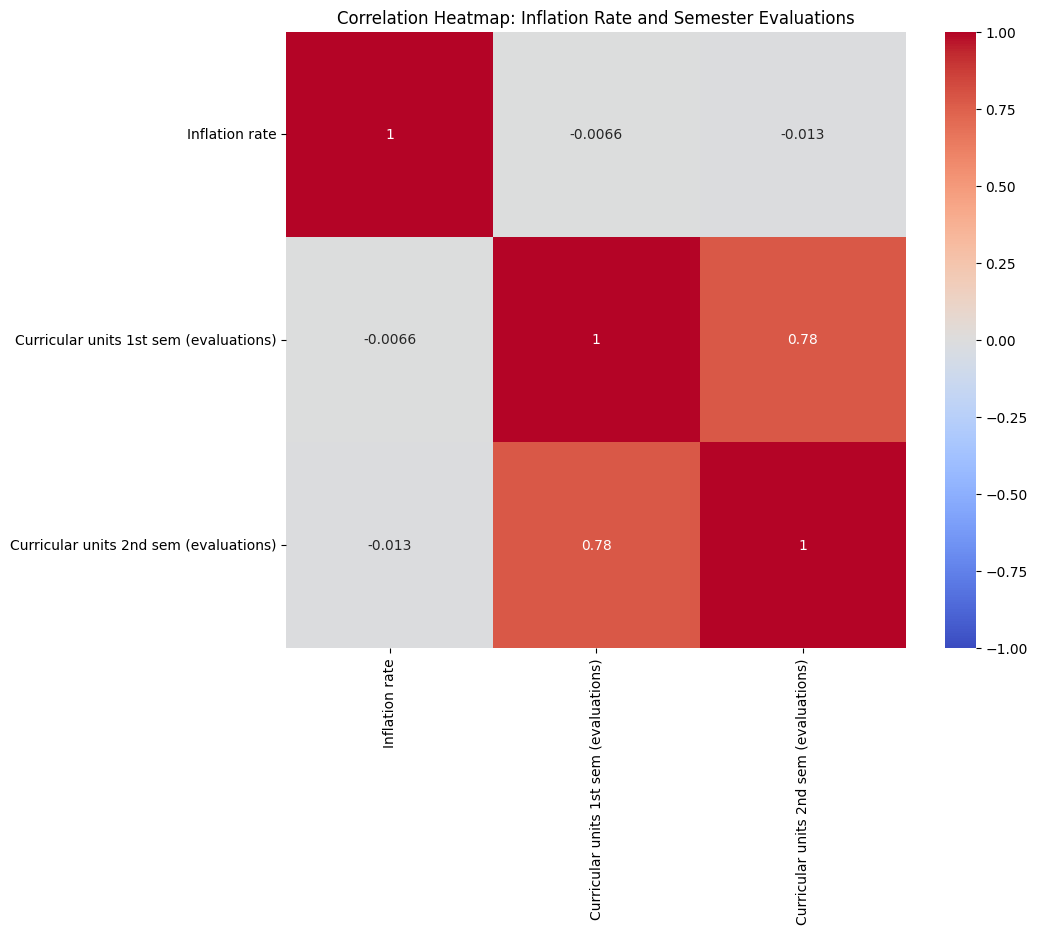

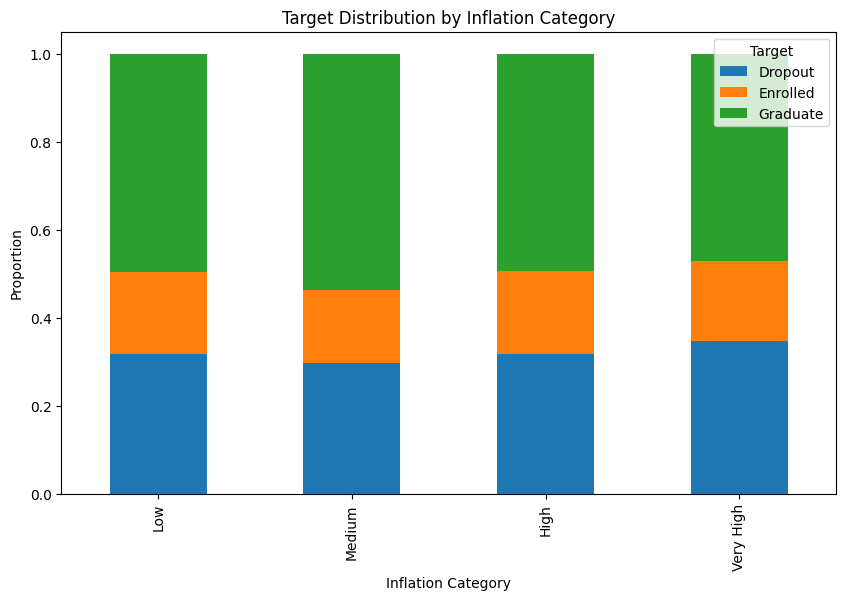


분석 결과 요약:
1. 물가상승률 범주별 평균 평가 학점:
                    Curricular units 1st sem (evaluations)  \
Inflation_category                                           
Low                                               8.522210   
Medium                                            8.230958   
High                                              7.824188   
Very High                                         8.516222   

                    Curricular units 2nd sem (evaluations)  
Inflation_category                                          
Low                                               7.767064  
Medium                                            8.331695  
High                                              8.165733  
Very High                                         7.958183  

2. 물가상승률 범주별 Target 분포:
Target               Dropout  Enrolled  Graduate
Inflation_category                              
Low                 0.316360  0.187432  0.496208
Medium              0.297297  0.166257  0.536446
High  

In [929]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 로드
df = pd.read_csv('./data/data_students.csv', encoding='EUC-KR')

# 필요한 열만 선택
columns_of_interest = ['Inflation rate', 'Curricular units 1st sem (evaluations)', 
                       'Curricular units 2nd sem (evaluations)', 'Target']
df_subset = df[columns_of_interest]

# 결측치 확인 및 처리
print("결측치 확인:")
print(df_subset.isnull().sum())
df_subset = df_subset.dropna()  # 결측치가 있는 행 제거

# 물가상승률 범주화
df_subset['Inflation_category'] = pd.cut(df_subset['Inflation rate'], 
                                         bins=[-np.inf, 0, 1, 2, np.inf],
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# 1. 물가상승률과 학기별 평가 학점의 산점도
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_subset, x='Inflation rate', y='Curricular units 1st sem (evaluations)', hue='Target')
plt.title('Inflation Rate vs 1st Semester Evaluations')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_subset, x='Inflation rate', y='Curricular units 2nd sem (evaluations)', hue='Target')
plt.title('Inflation Rate vs 2nd Semester Evaluations')

plt.tight_layout()
plt.show()

# 2. 물가상승률 범주에 따른 학기별 평가 학점 박스플롯
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_subset, x='Inflation_category', y='Curricular units 1st sem (evaluations)')
plt.title('1st Semester Evaluations by Inflation Category')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_subset, x='Inflation_category', y='Curricular units 2nd sem (evaluations)')
plt.title('2nd Semester Evaluations by Inflation Category')

plt.tight_layout()
plt.show()

# 3. 물가상승률 범주와 Target의 관계
plt.figure(figsize=(10, 6))
sns.countplot(data=df_subset, x='Inflation_category', hue='Target')
plt.title('Distribution of Target by Inflation Category')
plt.show()

# 4. 물가상승률과 학기별 평가 학점의 상관관계 히트맵
correlation = df_subset[['Inflation rate', 'Curricular units 1st sem (evaluations)', 
                         'Curricular units 2nd sem (evaluations)']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Inflation Rate and Semester Evaluations')
plt.show()

# 5. 물가상승률 범주별 Target 분포
target_dist = df_subset.groupby('Inflation_category')['Target'].value_counts(normalize=True).unstack()
target_dist.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Target Distribution by Inflation Category')
plt.xlabel('Inflation Category')
plt.ylabel('Proportion')
plt.legend(title='Target')
plt.show()

# 결과 요약
print("\n분석 결과 요약:")
print("1. 물가상승률 범주별 평균 평가 학점:")
print(df_subset.groupby('Inflation_category')[['Curricular units 1st sem (evaluations)', 
                                               'Curricular units 2nd sem (evaluations)']].mean())

print("\n2. 물가상승률 범주별 Target 분포:")
print(target_dist)

print("\n3. 물가상승률과 평가 학점의 상관계수:")
print(correlation['Inflation rate'])

In [930]:
# 데이터 로드
df = pd.read_csv('./data/data_students.csv', encoding='EUC-KR')

In [931]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nacionality', 'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units

In [932]:
df[['Inflation rate','Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']].head()

,Inflation rate,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations)
0,1.4,0,0
1,-0.3,6,6
2,1.4,0,0
3,-0.8,8,10
4,-0.3,9,6


Inflation rate                            0
Curricular units 1st sem (evaluations)    0
Curricular units 2nd sem (evaluations)    0
dtype: int64


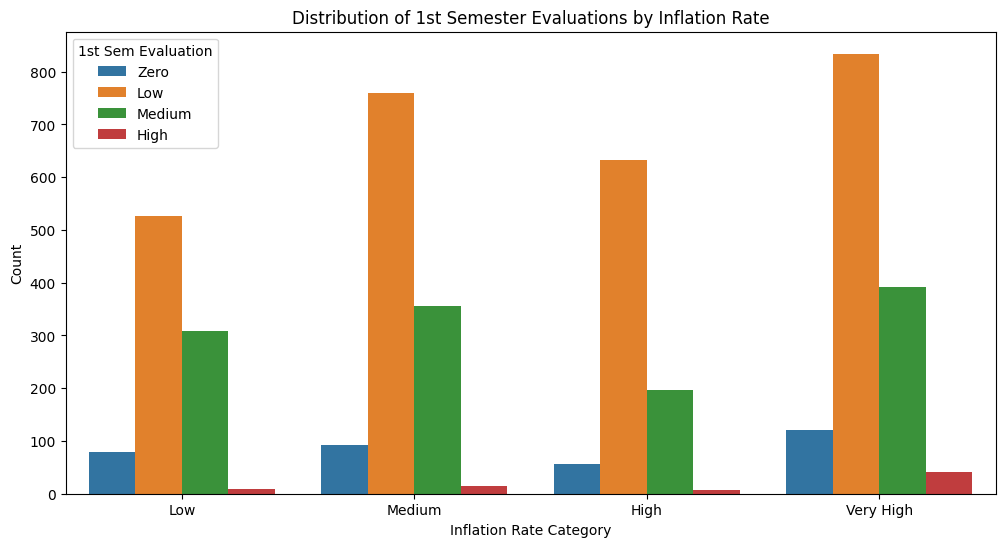

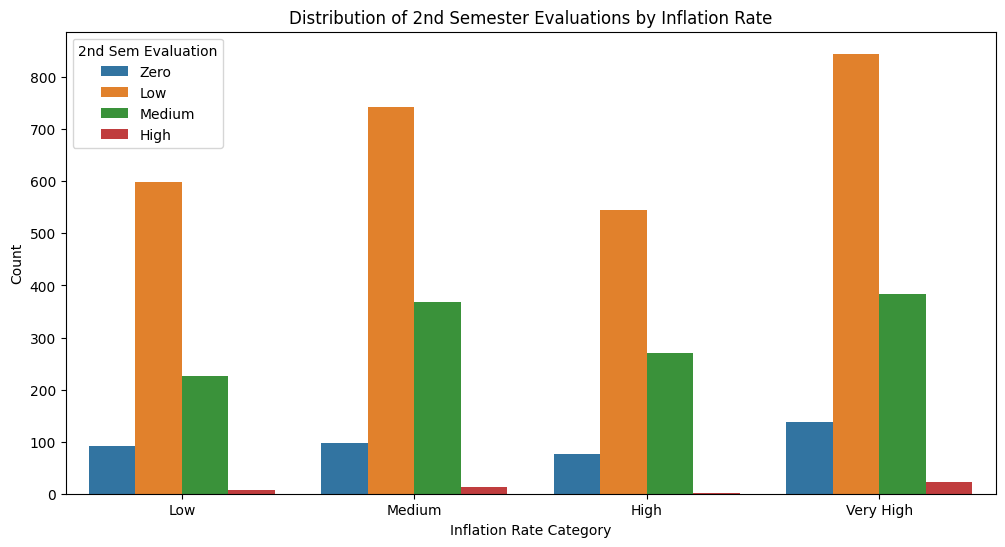


분석 결과 요약:
1. 물가상승률 범주별 1학기 평가 학점 분포:
1st_sem_category        High       Low    Medium      Zero
Inflation_category                                        
Low                 0.009751  0.570964  0.333694  0.085590
Medium              0.011466  0.622441  0.290745  0.075348
High                0.008959  0.707727  0.219485  0.063830
Very High           0.029560  0.601298  0.281903  0.087239

2. 물가상승률 범주별 2학기 평가 학점 분포:
2nd_sem_category        High       Low    Medium      Zero
Inflation_category                                        
Low                 0.007584  0.648971  0.244854  0.098592
Medium              0.009828  0.608518  0.302211  0.079443
High                0.002240  0.610302  0.302352  0.085106
Very High           0.015862  0.609229  0.276136  0.098774

3. 물가상승률과 1학기 평가 학점의 상관계수: -0.0066
4. 물가상승률과 2학기 평가 학점의 상관계수: -0.0126


In [933]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('./data/data_students.csv', encoding='EUC-KR')

# 필요한 열만 선택
columns_of_interest = ['Inflation rate', 'Curricular units 1st sem (evaluations)', 
                       'Curricular units 2nd sem (evaluations)']
df_subset = df[columns_of_interest]

# 결측치 확인 및 처리
print(df_subset.isnull().sum())
df_subset = df_subset.dropna()  # 결측치가 있는 행 제거

# 물가상승률을 범주형으로 변환
df_subset['Inflation_category'] = pd.cut(df_subset['Inflation rate'], 
                                         bins=[-float('inf'), 0, 1, 2, float('inf')],
                                         labels=['Low', 'Medium', 'High', 'Very High'])

# 평가 학점을 범주형으로 변환
def categorize_grade(x):
    if x == 0:
        return 'Zero'
    elif x < 10:
        return 'Low'
    elif x < 20:
        return 'Medium'
    else:
        return 'High'

df_subset['1st_sem_category'] = df_subset['Curricular units 1st sem (evaluations)'].apply(categorize_grade)
df_subset['2nd_sem_category'] = df_subset['Curricular units 2nd sem (evaluations)'].apply(categorize_grade)

# 물가상승률에 따른 1학기 평가 학점 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Inflation_category', hue='1st_sem_category', data=df_subset)
plt.title('Distribution of 1st Semester Evaluations by Inflation Rate')
plt.xlabel('Inflation Rate Category')
plt.ylabel('Count')
plt.legend(title='1st Sem Evaluation')
plt.show()

# 물가상승률에 따른 2학기 평가 학점 분포
plt.figure(figsize=(12, 6))
sns.countplot(x='Inflation_category', hue='2nd_sem_category', data=df_subset)
plt.title('Distribution of 2nd Semester Evaluations by Inflation Rate')
plt.xlabel('Inflation Rate Category')
plt.ylabel('Count')
plt.legend(title='2nd Sem Evaluation')
plt.show()

# 결과 요약
print("\n분석 결과 요약:")
print("1. 물가상승률 범주별 1학기 평가 학점 분포:")
print(df_subset.groupby('Inflation_category')['1st_sem_category'].value_counts(normalize=True).unstack())

print("\n2. 물가상승률 범주별 2학기 평가 학점 분포:")
print(df_subset.groupby('Inflation_category')['2nd_sem_category'].value_counts(normalize=True).unstack())

# 물가상승률과 평가 학점의 상관관계
correlation_1st = df_subset['Inflation rate'].corr(df_subset['Curricular units 1st sem (evaluations)'])
correlation_2nd = df_subset['Inflation rate'].corr(df_subset['Curricular units 2nd sem (evaluations)'])

print(f"\n3. 물가상승률과 1학기 평가 학점의 상관계수: {correlation_1st:.4f}")
print(f"4. 물가상승률과 2학기 평가 학점의 상관계수: {correlation_2nd:.4f}")

In [952]:
# 필요한 열만 선택
columns_of_interest = ['Inflation rate', 'Curricular units 1st sem (evaluations)', 
                       'Curricular units 2nd sem (evaluations)', 'Target']
df_subset = df[columns_of_interest]

# 결측치 확인 및 처리
print(df_subset.isnull().sum())
df_subset = df_subset.dropna()  # 결측치가 있는 행 제거

# 기술 통계량 확인
print(df_subset.describe())

Inflation rate                            0
Curricular units 1st sem (evaluations)    0
Curricular units 2nd sem (evaluations)    0
Target                                    0
dtype: int64
       Inflation rate  Curricular units 1st sem (evaluations)  \
count     4424.000000                             4424.000000   
mean         1.228029                                8.299051   
std          1.382711                                4.179106   
min         -0.800000                                0.000000   
25%          0.300000                                6.000000   
50%          1.400000                                8.000000   
75%          2.600000                               10.000000   
max          3.700000                               45.000000   

       Curricular units 2nd sem (evaluations)  
count                             4424.000000  
mean                                 8.063291  
std                                  3.947951  
min                              

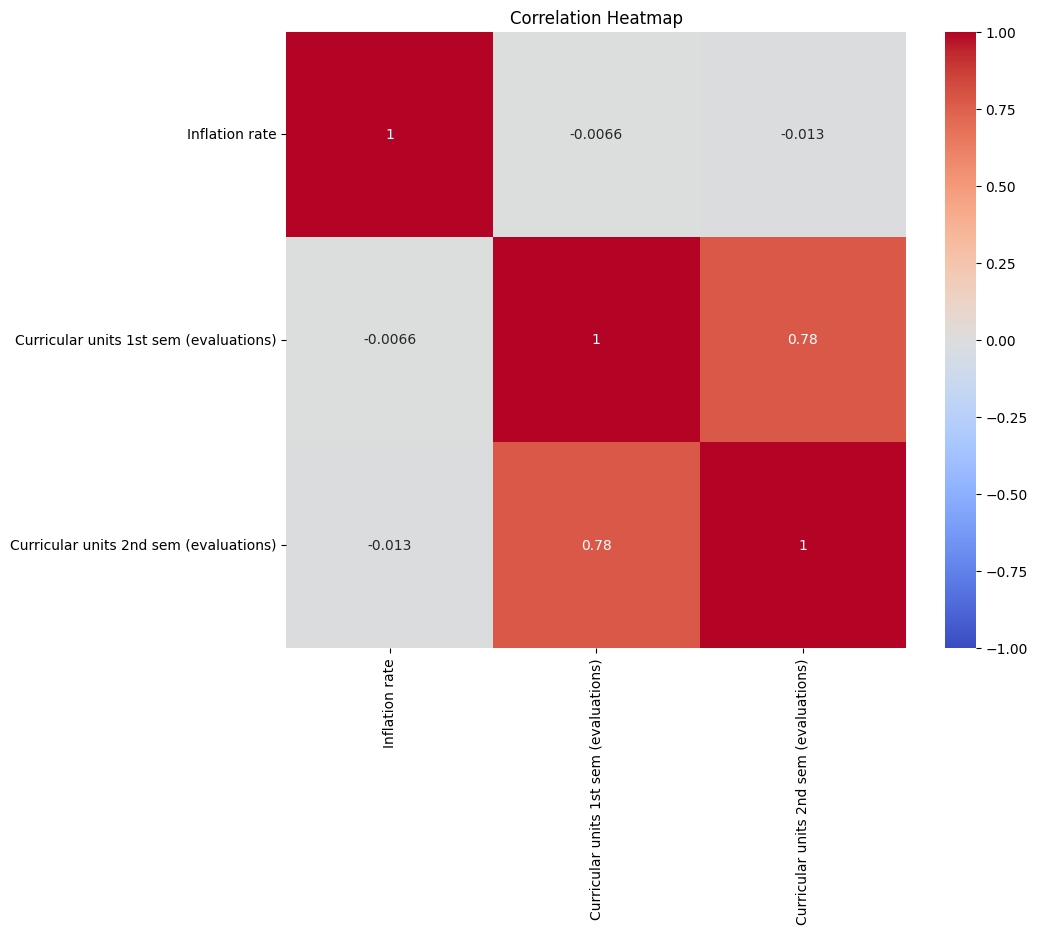

In [953]:
# 수치형 변수들의 상관관계 분석
numeric_columns = ['Inflation rate', 'Curricular units 1st sem (evaluations)', 
                   'Curricular units 2nd sem (evaluations)']
correlation = df_subset[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

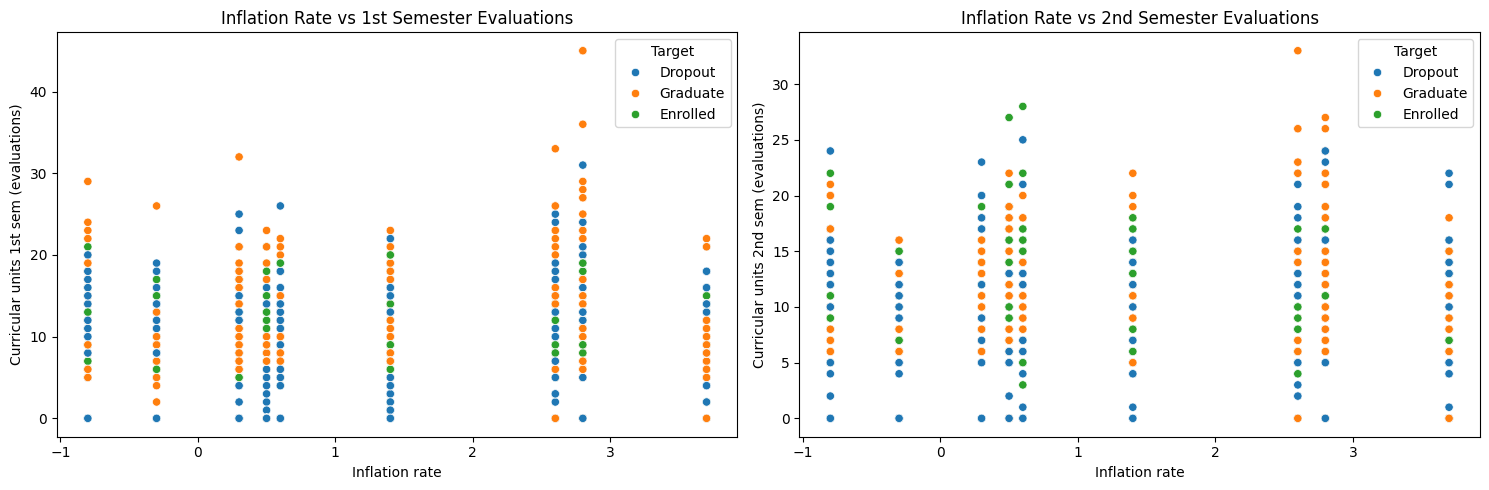

In [954]:
# 물가상승률과 학기별 평가 학점의 산점도
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_subset, x='Inflation rate', y='Curricular units 1st sem (evaluations)', hue='Target')
plt.title('Inflation Rate vs 1st Semester Evaluations')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_subset, x='Inflation rate', y='Curricular units 2nd sem (evaluations)', hue='Target')
plt.title('Inflation Rate vs 2nd Semester Evaluations')

plt.tight_layout()
plt.show()

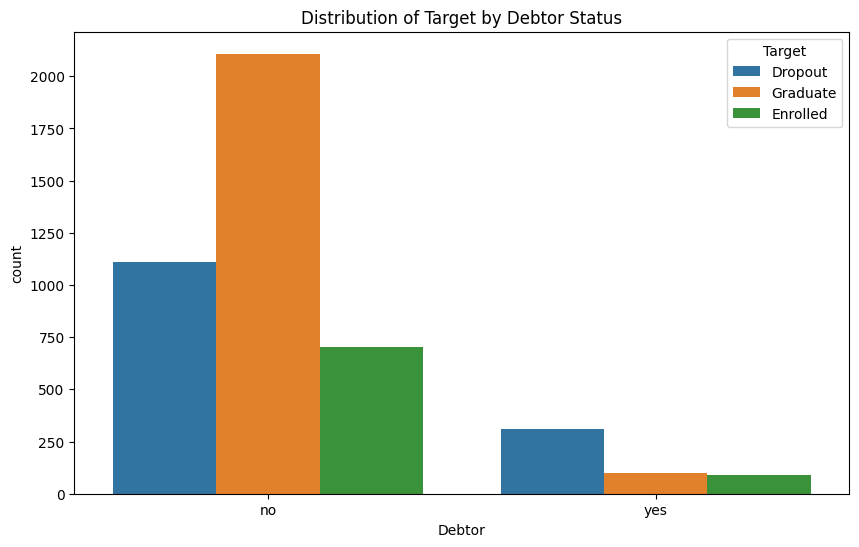

In [937]:
# Debtor와 Target 변수의 관계 시각화
plt.figure(figsize=(10,6))
sns.countplot(x='Debtor', hue='Target', data=df)
plt.title('Distribution of Target by Debtor Status')
plt.show()

In [938]:
# 필요한 특성 선택
features = ['Debtor', 'Tuition fees up to date', 'Scholarship holder']
X = df[features]
y = df['Target']

In [939]:
# 데이터 전처리
X = pd.get_dummies(X, columns=['Debtor', 'Tuition fees up to date', 'Scholarship holder'], drop_first=True)

In [940]:
variables = [
    'Debtor', 'Target'
]
print(df[variables].describe())

       Debtor    Target
count    4424      4424
unique      2         3
top        no  Graduate
freq     3921      2209


In [941]:
# 범주형 변수의 유니크 값 확인
for col in ['Debtor', 'Target']:
    print(f"{col} unique values: {df[col].unique()}")

Debtor unique values: ['no' 'yes']
Target unique values: ['Dropout' 'Graduate' 'Enrolled']


In [942]:
# 범주형 변수를 수치형으로 변환
df['Debtor'] = df['Debtor'].map({'yes': 1, 'no': 0})

# Target 변수를 수치형으로 변환
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# 변환 후 확인
print(df[['Debtor', 'Target']])

      Debtor  Target
0          0       0
1          0       2
2          0       0
3          0       2
4          0       2
...      ...     ...
4419       0       2
4420       1       0
4421       0       0
4422       0       2
4423       0       2

[4424 rows x 2 columns]


In [943]:
# 데이터 로드
df = pd.read_csv('./data/data_students.csv')

# 관심 있는 변수들 선택
variables = [
    'Unemployment rate', 'Inflation rate', 'GDP',
    'Debtor', 'Tuition fees up to date', 'Scholarship holder',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (evaluations)'
]
# 선택된 변수들의 기술 통계량 확인
print(df[variables].describe())

       Unemployment rate  Inflation rate          GDP  \
count        4424.000000     4424.000000  4424.000000   
mean           11.566139        1.228029     0.001969   
std             2.663850        1.382711     2.269935   
min             7.600000       -0.800000    -4.060000   
25%             9.400000        0.300000    -1.700000   
50%            11.100000        1.400000     0.320000   
75%            13.900000        2.600000     1.790000   
max            16.200000        3.700000     3.510000   

       Curricular units 1st sem (evaluations)  \
count                             4424.000000   
mean                                 8.299051   
std                                  4.179106   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 45.000000   

       Curricular units 2nd sem (evaluations

In [944]:
# 범주형 변수의 유니크 값 확인
for col in ['Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Target']:
    print(f"{col} unique values: {df[col].unique()}")

# 범주형 변수를 수치형으로 변환
df['Debtor'] = df['Debtor'].map({'yes': 1, 'no': 0})
df['Tuition fees up to date'] = df['Tuition fees up to date'].map({'yes': 1, 'no': 0})
df['Scholarship holder'] = df['Scholarship holder'].map({'yes': 1, 'no': 0})

# Target 변수를 수치형으로 변환
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# 변환 후 확인
print(df[['Debtor', 'Tuition fees up to date', 'Scholarship holder', 'Target']].head())

Debtor unique values: ['no' 'yes']
Tuition fees up to date unique values: ['yes' 'no']
Scholarship holder unique values: ['no' 'yes']
Target unique values: ['Dropout' 'Graduate' 'Enrolled']
   Debtor  Tuition fees up to date  Scholarship holder  Target
0       0                        1                   0       0
1       0                        0                   0       2
2       0                        0                   0       0
3       0                        1                   0       2
4       0                        1                   0       2


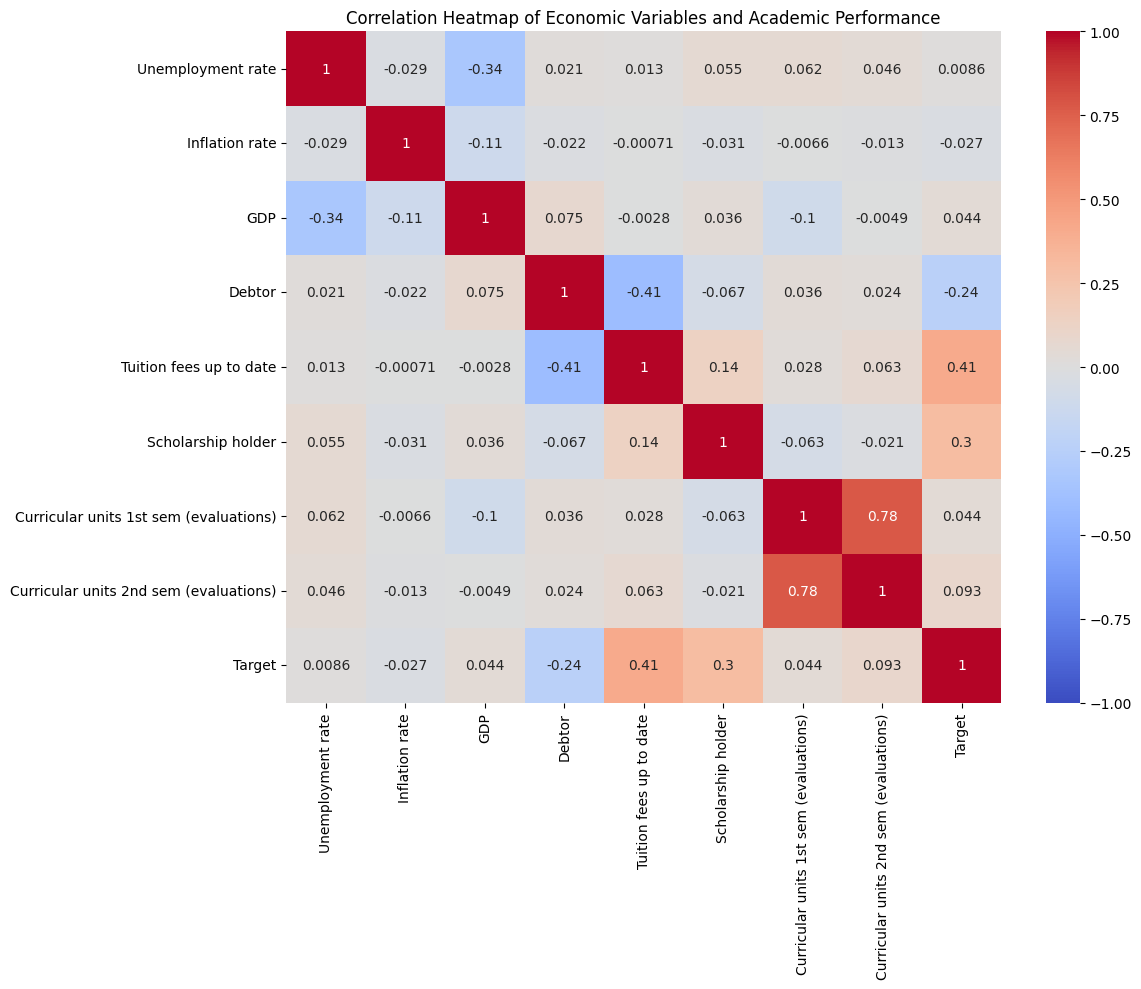

In [945]:
# 선택된 변수들의 상관 행렬 계산
correlation_matrix = df[variables + ['Target']].corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Economic Variables and Academic Performance')
plt.tight_layout()
plt.show()

In [946]:
# 주요 변수들 간의 상관관계 분석
print("주요 변수들 간의 상관관계:")
for var in variables:
    correlation, p_value = stats.pearsonr(df[var], df['Target'])
    print(f"{var}와 Target 간의 상관계수: {correlation:.4f}, p-value: {p_value:.4f}")

주요 변수들 간의 상관관계:
Unemployment rate와 Target 간의 상관계수: 0.0086, p-value: 0.5662
Inflation rate와 Target 간의 상관계수: -0.0269, p-value: 0.0739
GDP와 Target 간의 상관계수: 0.0441, p-value: 0.0033
Debtor와 Target 간의 상관계수: -0.2410, p-value: 0.0000
Tuition fees up to date와 Target 간의 상관계수: 0.4098, p-value: 0.0000
Scholarship holder와 Target 간의 상관계수: 0.2976, p-value: 0.0000
Curricular units 1st sem (evaluations)와 Target 간의 상관계수: 0.0444, p-value: 0.0032
Curricular units 2nd sem (evaluations)와 Target 간의 상관계수: 0.0927, p-value: 0.0000


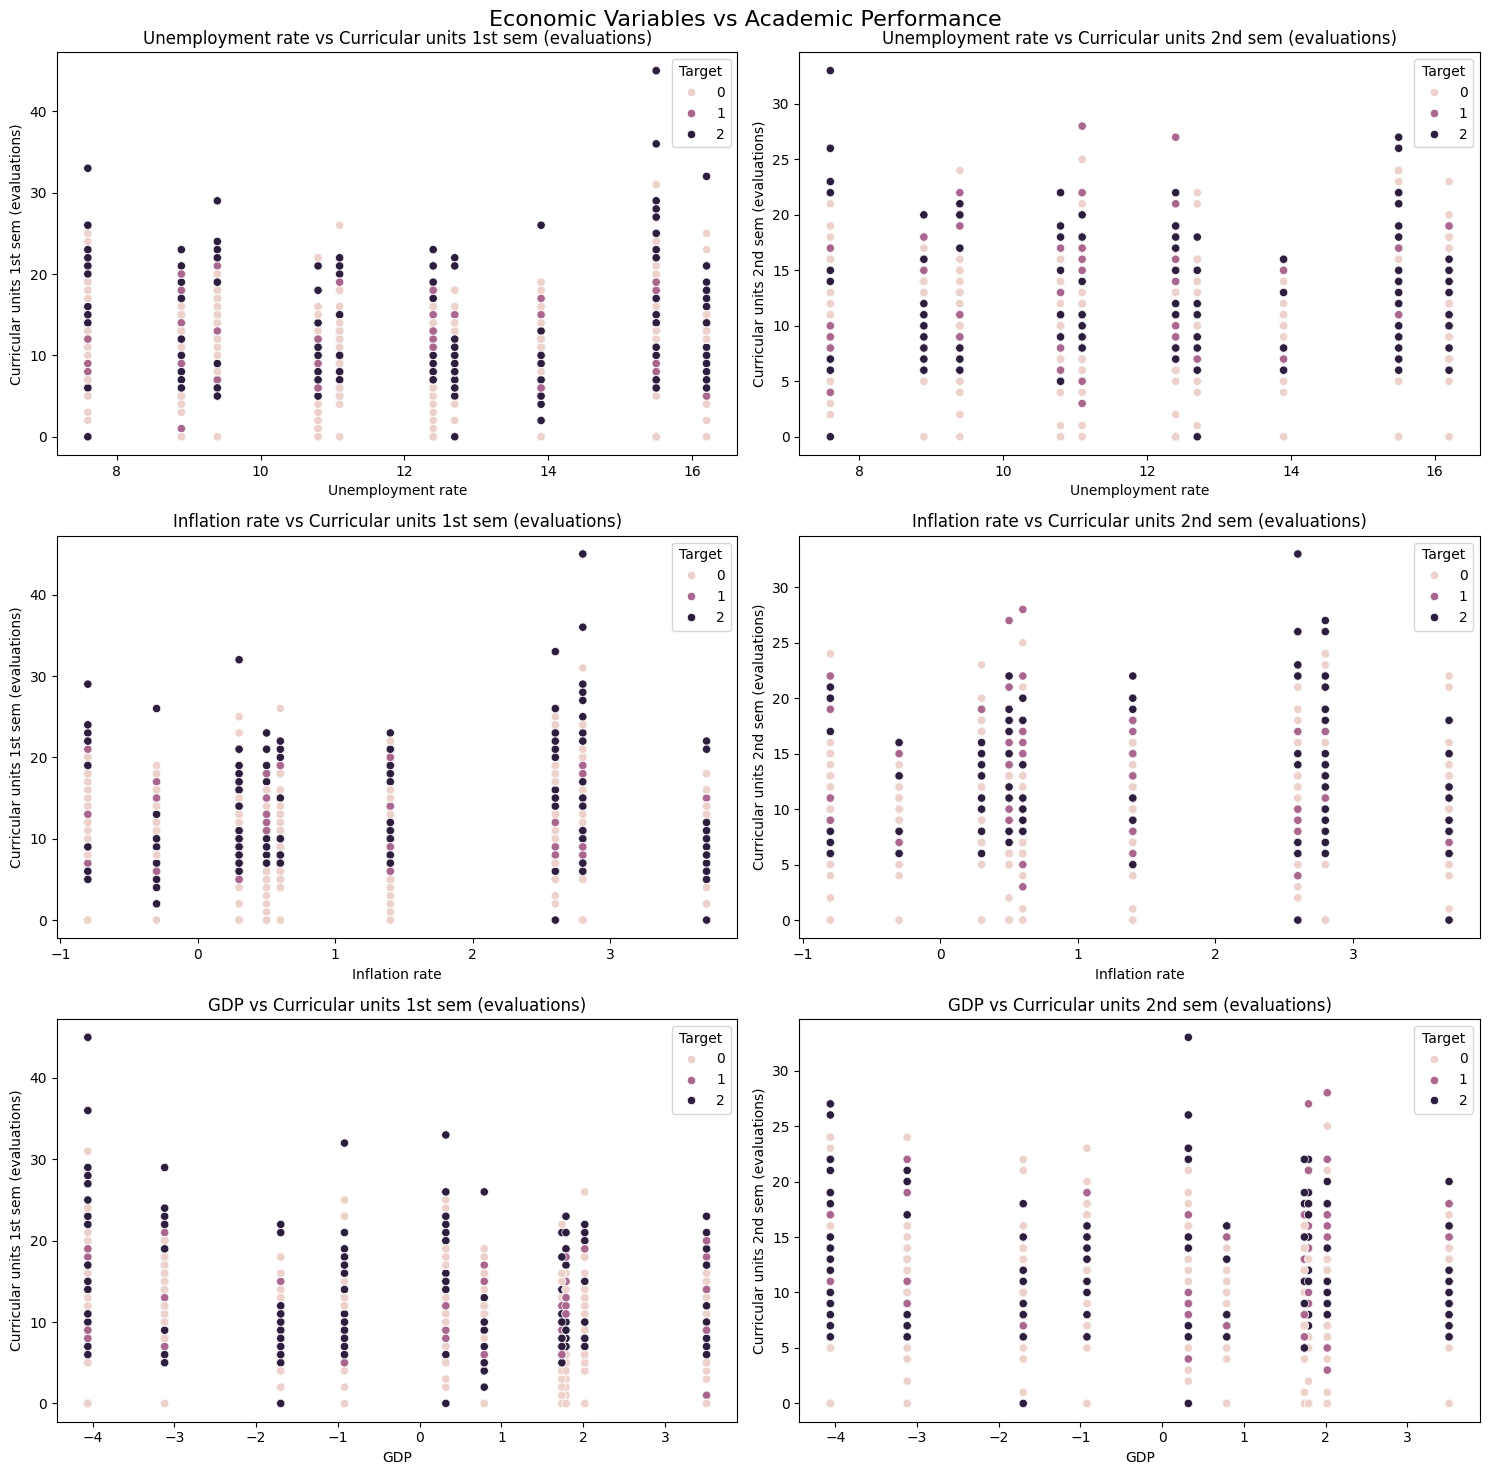

In [947]:
# 경제 변수들과 학업 성취도 간의 산점도
economic_vars = ['Unemployment rate', 'Inflation rate', 'GDP']
academic_vars = ['Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']

fig, axes = plt.subplots(len(economic_vars), len(academic_vars), figsize=(15, 15))
fig.suptitle('Economic Variables vs Academic Performance', fontsize=16)

for i, eco_var in enumerate(economic_vars):
    for j, acad_var in enumerate(academic_vars):
        sns.scatterplot(data=df, x=eco_var, y=acad_var, hue='Target', ax=axes[i, j])
        axes[i, j].set_title(f'{eco_var} vs {acad_var}')

plt.tight_layout()
plt.show()

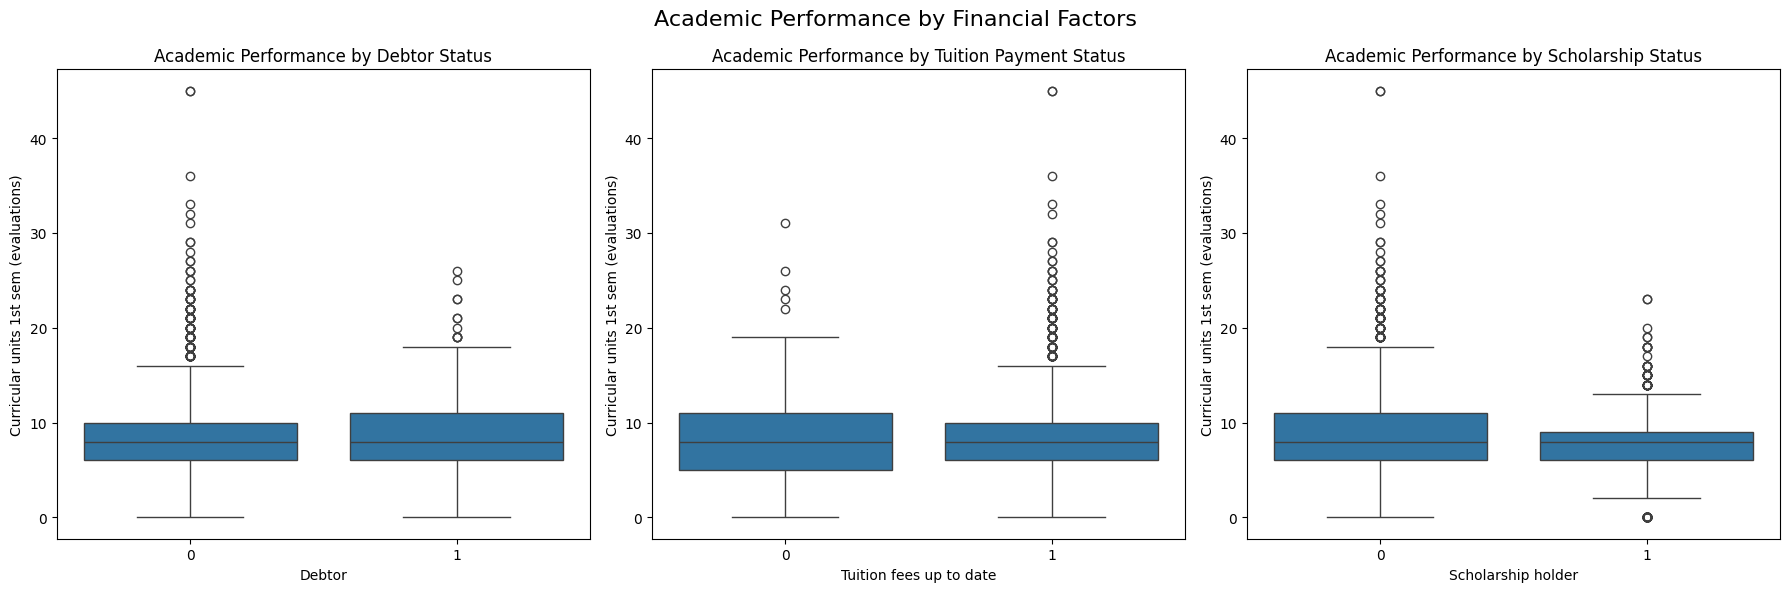

In [948]:
# 채무 상태, 학비 납부 여부, 장학금 수혜 여부에 따른 학업 성취도 비교
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Academic Performance by Financial Factors', fontsize=16)

sns.boxplot(data=df, x='Debtor', y='Curricular units 1st sem (evaluations)', ax=axes[0])
axes[0].set_title('Academic Performance by Debtor Status')

sns.boxplot(data=df, x='Tuition fees up to date', y='Curricular units 1st sem (evaluations)', ax=axes[1])
axes[1].set_title('Academic Performance by Tuition Payment Status')

sns.boxplot(data=df, x='Scholarship holder', y='Curricular units 1st sem (evaluations)', ax=axes[2])
axes[2].set_title('Academic Performance by Scholarship Status')

plt.tight_layout()
plt.show()

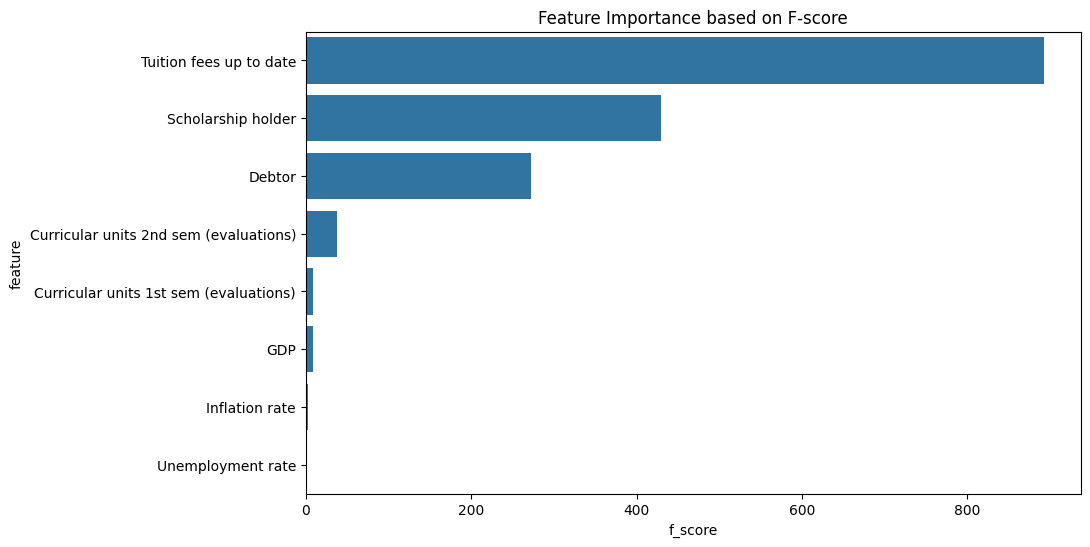

                                  feature     f_score
4                 Tuition fees up to date  892.635360
5                      Scholarship holder  429.679045
3                                  Debtor  272.668562
7  Curricular units 2nd sem (evaluations)   38.346125
6  Curricular units 1st sem (evaluations)    8.719423
2                                     GDP    8.630296
1                          Inflation rate    3.195944
0                       Unemployment rate    0.329108


In [949]:
# 각 변수의 Target에 대한 영향 분석 (추가 분석)
from sklearn.feature_selection import f_regression

X = df[variables]
y = df['Target']

f_scores, _ = f_regression(X, y)

feature_importance = pd.DataFrame({'feature': variables, 'f_score': f_scores})
feature_importance = feature_importance.sort_values('f_score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='f_score', y='feature', data=feature_importance)
plt.title('Feature Importance based on F-score')
plt.show()

print(feature_importance)

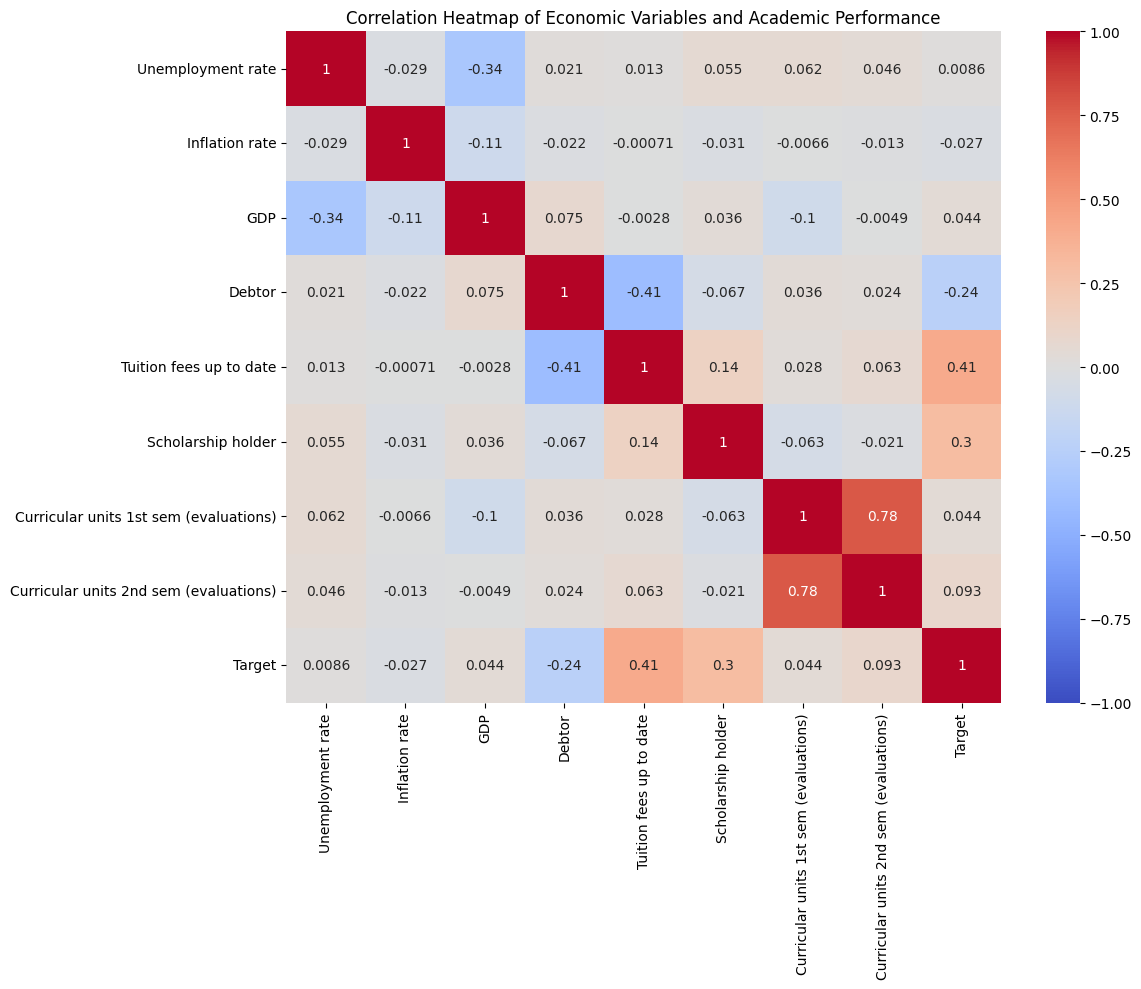

주요 변수들 간의 상관관계:
Unemployment rate와 Target 간의 상관계수: 0.0086, p-value: 0.5662
Inflation rate와 Target 간의 상관계수: -0.0269, p-value: 0.0739
GDP와 Target 간의 상관계수: 0.0441, p-value: 0.0033
Debtor와 Target 간의 상관계수: -0.2410, p-value: 0.0000
Tuition fees up to date와 Target 간의 상관계수: 0.4098, p-value: 0.0000
Scholarship holder와 Target 간의 상관계수: 0.2976, p-value: 0.0000
Curricular units 1st sem (evaluations)와 Target 간의 상관계수: 0.0444, p-value: 0.0032
Curricular units 2nd sem (evaluations)와 Target 간의 상관계수: 0.0927, p-value: 0.0000


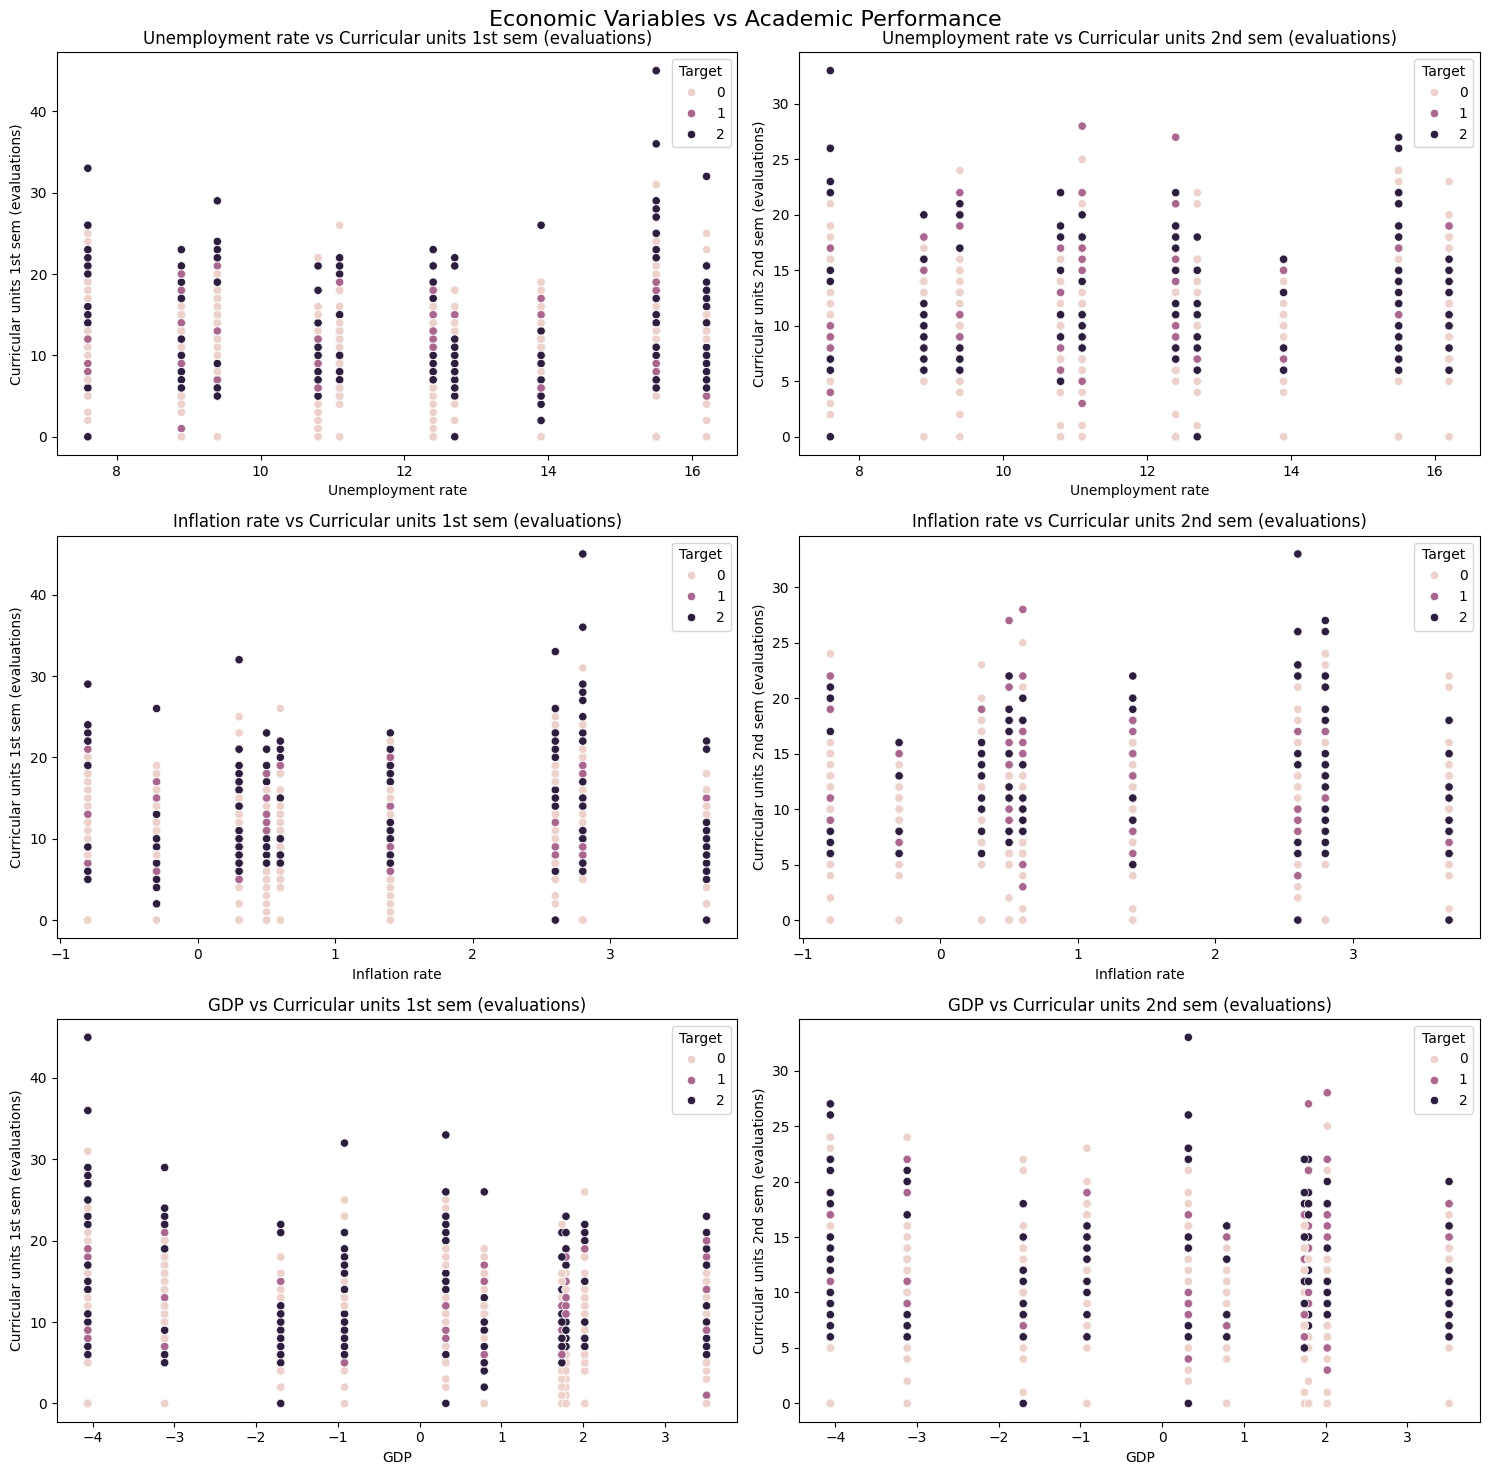

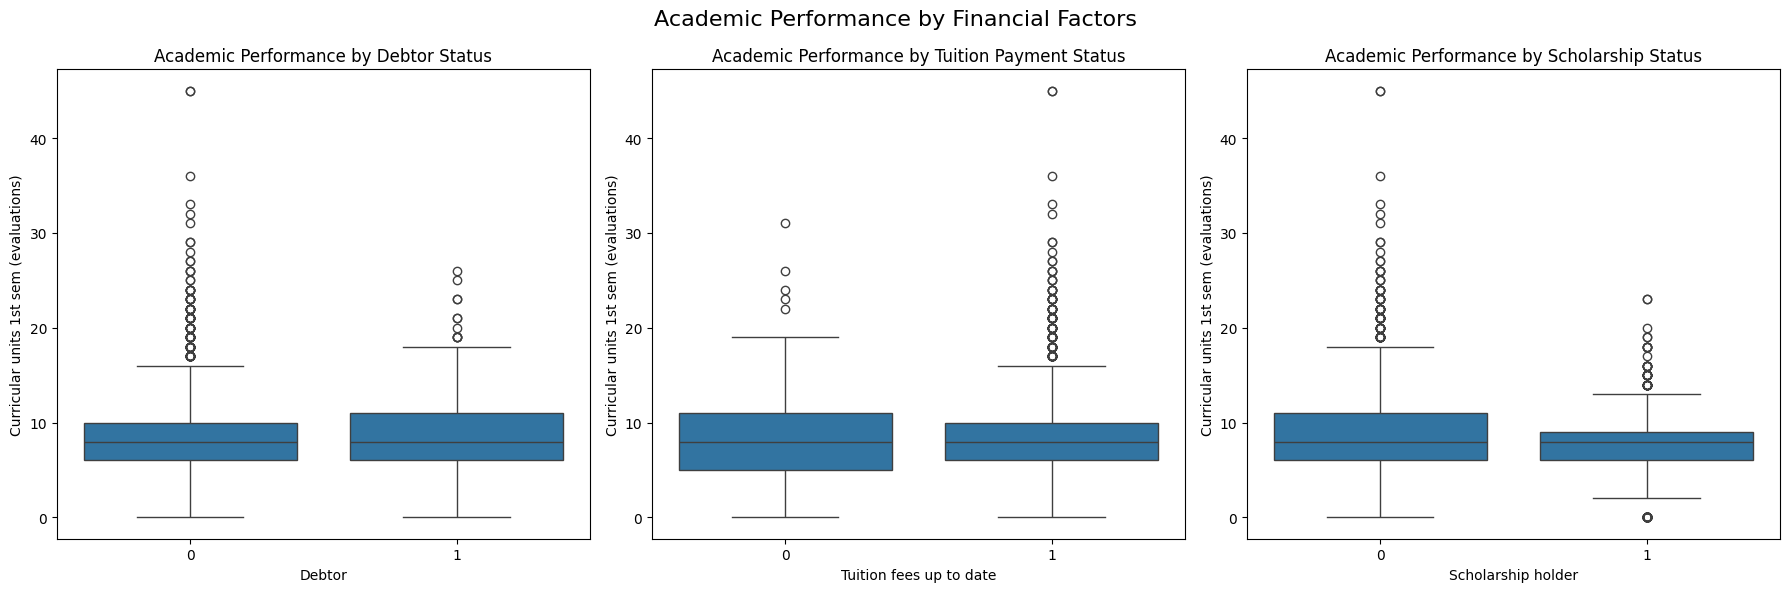

In [950]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 데이터 로드
df = pd.read_csv('./data/data_students.csv')

# 관심 있는 변수들 선택
variables = [
    'Unemployment rate', 'Inflation rate', 'GDP',
    'Debtor', 'Tuition fees up to date', 'Scholarship holder',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (evaluations)'
]

# 범주형 변수를 수치형으로 변환
# 'yes'는 1로, 'no'는 0으로 변환합니다.
df['Debtor'] = df['Debtor'].map({'yes': 1, 'no': 0})
df['Tuition fees up to date'] = df['Tuition fees up to date'].map({'yes': 1, 'no': 0})
df['Scholarship holder'] = df['Scholarship holder'].map({'yes': 1, 'no': 0})

# Target 변수를 수치형으로 변환
# 'Dropout'은 0, 'Enrolled'는 1, 'Graduate'는 2로 변환합니다.
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# 선택된 변수들의 상관 행렬 계산
correlation_matrix = df[variables + ['Target']].corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Economic Variables and Academic Performance')
plt.tight_layout()
plt.show()

# 주요 변수들 간의 상관관계 분석
print("주요 변수들 간의 상관관계:")
for var in variables:
    correlation, p_value = stats.pearsonr(df[var], df['Target'])
    print(f"{var}와 Target 간의 상관계수: {correlation:.4f}, p-value: {p_value:.4f}")

# 경제 변수들과 학업 성취도 간의 산점도
economic_vars = ['Unemployment rate', 'Inflation rate', 'GDP']
academic_vars = ['Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)']

fig, axes = plt.subplots(len(economic_vars), len(academic_vars), figsize=(15, 15))
fig.suptitle('Economic Variables vs Academic Performance', fontsize=16)

for i, eco_var in enumerate(economic_vars):
    for j, acad_var in enumerate(academic_vars):
        sns.scatterplot(data=df, x=eco_var, y=acad_var, hue='Target', ax=axes[i, j])
        axes[i, j].set_title(f'{eco_var} vs {acad_var}')

plt.tight_layout()
plt.show()

# 채무 상태, 학비 납부 여부, 장학금 수혜 여부에 따른 학업 성취도 비교
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Academic Performance by Financial Factors', fontsize=16)

sns.boxplot(data=df, x='Debtor', y='Curricular units 1st sem (evaluations)', ax=axes[0])
axes[0].set_title('Academic Performance by Debtor Status')

sns.boxplot(data=df, x='Tuition fees up to date', y='Curricular units 1st sem (evaluations)', ax=axes[1])
axes[1].set_title('Academic Performance by Tuition Payment Status')

sns.boxplot(data=df, x='Scholarship holder', y='Curricular units 1st sem (evaluations)', ax=axes[2])
axes[2].set_title('Academic Performance by Scholarship Status')

plt.tight_layout()
plt.show()

네, 제공해 주신 결과를 바탕으로 가설을 검증해 보겠습니다.



1. 경제적 변수와 학업 성취도의 관계:

a) 실업률(Unemployment rate)과 Target:
   - 상관계수: 0.0086, p-value: 0.5662
   - 해석: 매우 약한 양의 상관관계가 있지만, p-value가 0.05보다 크므로 통계적으로 유의미하지 않습니다. 실업률이 학업 성취도에 유의미한 영향을 미친다고 볼 수 없습니다.

b) 물가상승률(Inflation rate)과 Target:
   - 상관계수: -0.0269, p-value: 0.0739
   - 해석: 매우 약한 음의 상관관계가 있지만, p-value가 0.05보다 크므로 통계적으로 유의미하지 않습니다. 물가상승률이 학업 성취도에 유의미한 영향을 미친다고 볼 수 없습니다.

c) GDP와 Target:
   - 상관계수: 0.0441, p-value: 0.0033
   - 해석: 매우 약한 양의 상관관계가 있으며, p-value가 0.05보다 작으므로 통계적으로 유의미합니다. GDP가 높을수록 학업 성취도가 약간 높아지는 경향이 있습니다.

2. 학생의 재정 상태와 학업 성취도의 관계:

a) 채무자 여부(Debtor)와 Target:
   - 상관계수: -0.2410, p-value: 0.0000
   - 해석: 약한 음의 상관관계가 있으며, p-value가 매우 작아 통계적으로 매우 유의미합니다. 채무가 있는 학생일수록 학업 성취도가 낮아지는 경향이 있습니다.

b) 학비 납부 여부(Tuition fees up to date)와 Target:
   - 상관계수: 0.4098, p-value: 0.0000
   - 해석: 중간 정도의 양의 상관관계가 있으며, p-value가 매우 작아 통계적으로 매우 유의미합니다. 학비를 제때 납부한 학생일수록 학업 성취도가 높아지는 경향이 있습니다.

c) 장학금 수혜 여부(Scholarship holder)와 Target:
   - 상관계수: 0.2976, p-value: 0.0000
   - 해석: 약한 양의 상관관계가 있으며, p-value가 매우 작아 통계적으로 매우 유의미합니다. 장학금을 받은 학생일수록 학업 성취도가 높아지는 경향이 있습니다.

3. 시각화 결과 해석:

- 히트맵(Image 1): 상관계수 분석 결과와 일치하는 패턴을 보여줍니다. 특히 학비 납부 여부와 장학금 수혜 여부가 Target과 더 강한 상관관계를 보이는 것을 확인할 수 있습니다.

- 산점도(Image 2): 경제적 변수와 학업 성취도 간의 관계가 뚜렷하지 않아 보입니다. 이는 약한 상관관계 결과와 일치합니다.

- 박스플롯(Image 3): 채무자 여부, 학비 납부 여부, 장학금 수혜 여부에 따른 학업 성취도의 차이를 보여줍니다. 특히 학비 납부 여부와 장학금 수혜 여부에 따른 차이가 더 뚜렷해 보입니다.

결론:

1. 경제적 변수의 영향: GDP만이 학업 성취도에 약간의 영향을 미치는 것으로 나타났습니다. 실업률과 물가상승률의 영향은 통계적으로 유의미하지 않았습니다. 따라서 경제적 환경이 학생들의 학업 성과에 미치는 영향은 제한적입니다.

2. 학생의 재정 상태의 영향: 채무자 여부, 학비 납부 여부, 장학금 수혜 여부 모두 학업 성취도에 통계적으로 유의미한 영향을 미치는 것으로 나타났습니다. 특히 학비 납부 여부가 가장 강한 상관관계를 보였습니다.

3. 가설 검증 결과: 경제적 변수보다는 학생의 개인적 재정 상태가 학업 성취도에 더 큰 영향을 미치는 것으로 나타났습니다. 따라서 가설은 부분적으로 지지되었다고 볼 수 있습니다.

이러한 결과는 학생들의 학업 성취도 향상을 위해 개인의 재정 상태 개선이 중요하다는 점을 시사합니다. 특히 학비 납부와 장학금 지원이 학업 성취도와 밀접한 관련이 있으므로, 이에 대한 정책적 지원이 효과적일 수 있습니다.

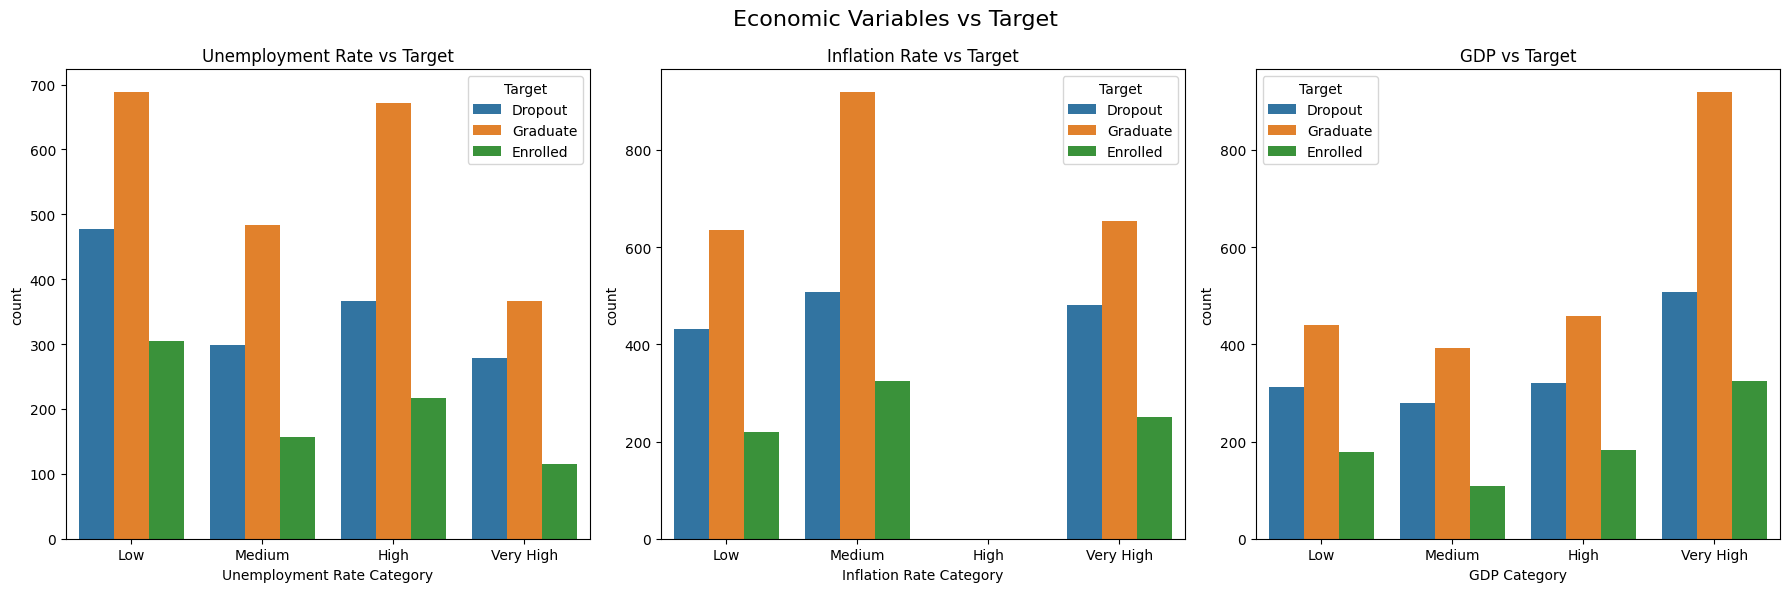

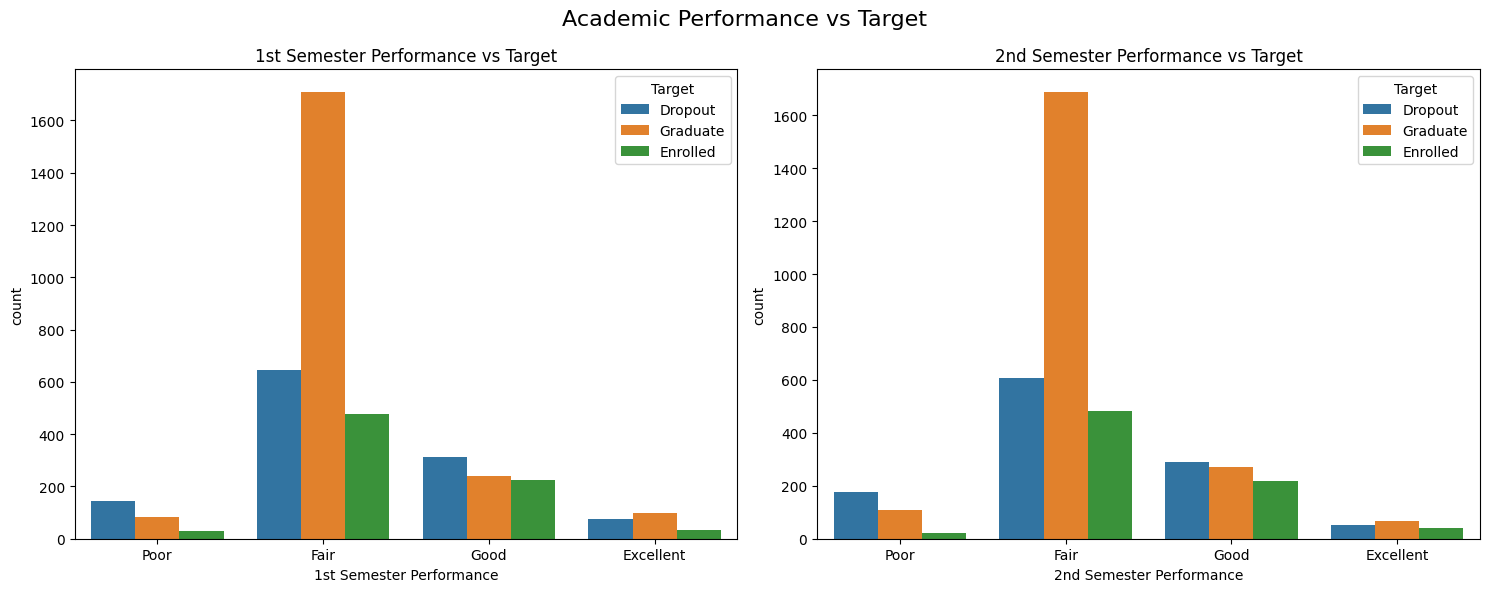

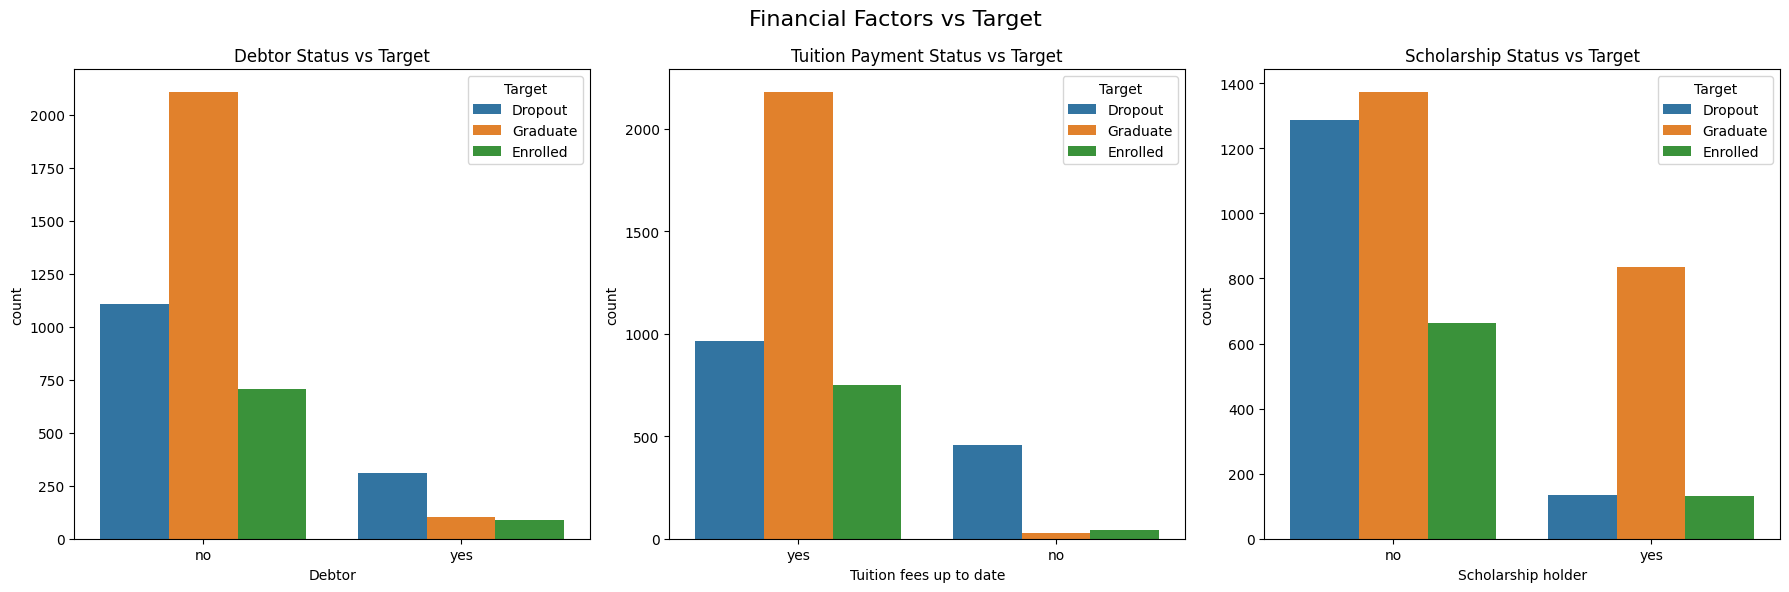

분석 결과 요약:

1. 경제 변수들과 Target의 관계:

Unemployment_cat에 따른 Target 분포:
Target             Dropout  Enrolled  Graduate
Unemployment_cat                              
Low               0.324728  0.207201  0.468071
Medium            0.318424  0.167199  0.514377
High              0.291866  0.173046  0.535088
Very High         0.366271  0.151515  0.482213

Inflation_cat에 따른 Target 분포:
Target          Dropout  Enrolled  Graduate
Inflation_cat                              
Low            0.335409  0.170428  0.494163
Medium         0.289954  0.184932  0.525114
High           0.000000  0.000000  0.000000
Very High      0.347513  0.180966  0.471521

GDP_cat에 따른 Target 분포:
Target      Dropout  Enrolled  Graduate
GDP_cat                                
Low        0.336559  0.191398  0.472043
Medium     0.358515  0.139565  0.501921
High       0.332986  0.190427  0.476587
Very High  0.289954  0.184932  0.525114

2. 학업 성취도와 Target의 관계:

1st_sem_performance에 따른 Target 분포:
Target                Dropout  En

In [951]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df = pd.read_csv('./data/data_students.csv')

# 경제 변수들을 범주화
df['Unemployment_cat'] = pd.cut(df['Unemployment rate'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Inflation_cat'] = pd.cut(df['Inflation rate'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['GDP_cat'] = pd.cut(df['GDP'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 학업 성취도 변수들을 범주화
df['1st_sem_performance'] = pd.cut(df['Curricular units 1st sem (evaluations)'], 
                                   bins=[0, 5, 10, 15, np.inf], 
                                   labels=['Poor', 'Fair', 'Good', 'Excellent'])
df['2nd_sem_performance'] = pd.cut(df['Curricular units 2nd sem (evaluations)'], 
                                   bins=[0, 5, 10, 15, np.inf], 
                                   labels=['Poor', 'Fair', 'Good', 'Excellent'])

# 경제 변수들과 Target의 관계
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Economic Variables vs Target', fontsize=16)

sns.countplot(data=df, x='Unemployment_cat', hue='Target', ax=axes[0])
axes[0].set_title('Unemployment Rate vs Target')
axes[0].set_xlabel('Unemployment Rate Category')

sns.countplot(data=df, x='Inflation_cat', hue='Target', ax=axes[1])
axes[1].set_title('Inflation Rate vs Target')
axes[1].set_xlabel('Inflation Rate Category')

sns.countplot(data=df, x='GDP_cat', hue='Target', ax=axes[2])
axes[2].set_title('GDP vs Target')
axes[2].set_xlabel('GDP Category')

plt.tight_layout()
plt.show()

# 학업 성취도와 Target의 관계
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Academic Performance vs Target', fontsize=16)

sns.countplot(data=df, x='1st_sem_performance', hue='Target', ax=axes[0])
axes[0].set_title('1st Semester Performance vs Target')
axes[0].set_xlabel('1st Semester Performance')

sns.countplot(data=df, x='2nd_sem_performance', hue='Target', ax=axes[1])
axes[1].set_title('2nd Semester Performance vs Target')
axes[1].set_xlabel('2nd Semester Performance')

plt.tight_layout()
plt.show()

# 재정적 요인과 Target의 관계
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Financial Factors vs Target', fontsize=16)

sns.countplot(data=df, x='Debtor', hue='Target', ax=axes[0])
axes[0].set_title('Debtor Status vs Target')

sns.countplot(data=df, x='Tuition fees up to date', hue='Target', ax=axes[1])
axes[1].set_title('Tuition Payment Status vs Target')

sns.countplot(data=df, x='Scholarship holder', hue='Target', ax=axes[2])
axes[2].set_title('Scholarship Status vs Target')

plt.tight_layout()
plt.show()

# 결과 요약
print("분석 결과 요약:")
print("\n1. 경제 변수들과 Target의 관계:")
for var in ['Unemployment_cat', 'Inflation_cat', 'GDP_cat']:
    print(f"\n{var}에 따른 Target 분포:")
    print(df.groupby(var)['Target'].value_counts(normalize=True).unstack())

print("\n2. 학업 성취도와 Target의 관계:")
for var in ['1st_sem_performance', '2nd_sem_performance']:
    print(f"\n{var}에 따른 Target 분포:")
    print(df.groupby(var)['Target'].value_counts(normalize=True).unstack())

print("\n3. 재정적 요인과 Target의 관계:")
for var in ['Debtor', 'Tuition fees up to date', 'Scholarship holder']:
    print(f"\n{var}에 따른 Target 분포:")
    print(df.groupby(var)['Target'].value_counts(normalize=True).unstack())